# Python Statelevel fitVirusXX
## Version 8.5
## Date: 12.03.2020
## Author: Azmyin Md. Kamal
### Phase calculation from single waves with upgraded figure
### Please review the instruction in the README.md for additional details

# Load Preambles

In [1]:
# Load all modules, function definitions and important variable definitions
from funcsXX import *

df = pd.read_csv("dataset.csv", header = 0)
#df.head(10)

In [2]:
# Load California Dataset. This is part of a larger dataset which will be released separately
state_names = ['California'] 
print(state_names)
type(state_names[0])

['California']


str

In [3]:
# Keep week array in memory
week_array_file = df['week'].values
#print(week_array_file)
#print(np.shape(week_array_file))
const_add = week_array_file[0] - 1
print(const_add) # Needed to scale week level data back

3


In [4]:
df_master = pd.DataFrame()
df_master['Week'] = week_array_file
#df_master.head(10)

# Main Loop


State --> California
Number of weeks data to fit is 38

R2 score for test for singe wave fit --> 0.9
RMSE score for test for single wave fit --> 98713.91632978506

Phase location before scaling --> [20, 24, 27, 38, 0]

Phase location after scaling --> [23 27 30 41  0]

(38,)


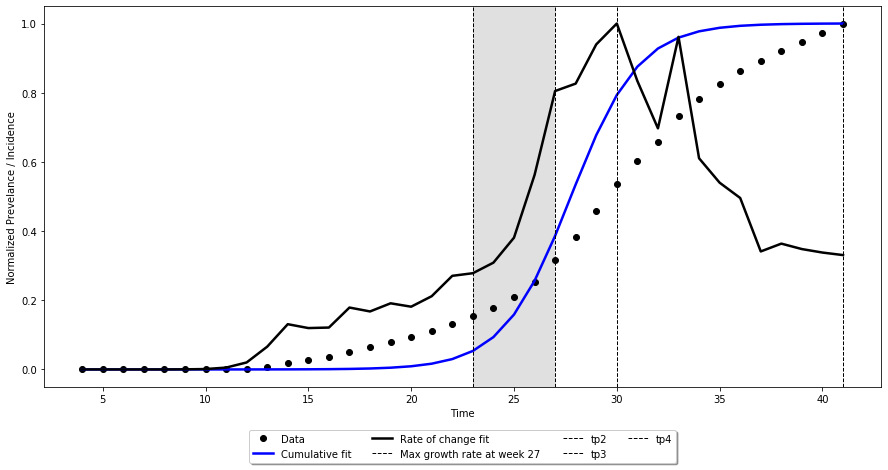

In [5]:
loss_state = []
for state_now in state_names:
    # Main loop
    b_wave1, timestamp_week, week_agg, y_pred, rr2_wave1 = master_fn(df = df,state_name = state_now, const_add = const_add, debug = True, plot_res = False)
    bb_fit1 = b_wave1
    t_cumu = timestamp_week
    y_act = week_agg
    y_pred = logisticFun(t_cumu, bb_fit1) # Calculate Prevelance
    #print(y_pred)

    # Calculate single wave incidence
    I_pred = fit_incidence_single(y_act,t_cumu,bb_fit1)
    I_act_w1 = np.diff(y_act)
    I_act_w1 = np.insert(I_act_w1, [0], [I_act_w1[0]])
    max_w1 = max(I_pred)

    # Find phase location
    w1_loc_ls1 = fit_single_phase(bb_fit1, t_cumu, False)
    print(f"Phase location before scaling --> {w1_loc_ls1}\n")
    max_end = max(timestamp_week)

    # Scale to right scale
    w1_loc_ls = np.asarray(scale_to_dat_week(w1_loc_ls1, const_add, max_w1))
    print(f"Phase location after scaling --> {w1_loc_ls}\n")

    # Setup variables for plotting    
    t_span = week_array_file # This ensures X axis has correct week values

    # Plot cumulative phases
    plot_cumu_phases(const_add, w1_loc_ls1,bb_fit1, t_span, y_act, y_pred, I_act_w1)